In [24]:
%matplotlib inline
import xarray as xr
import numpy as np
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering,ward_tree
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import MinMaxScaler
from pandas.tools.plotting import scatter_matrix
import matplotlib.colors as colors


In [2]:
data = xr.open_dataset("./mean_POC_budget_LR.nc")

In [24]:
data

<xarray.Dataset>
Dimensions:         (nlat: 384, nlon: 320, time: 1)
Coordinates:
  * nlat            (nlat) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * nlon            (nlon) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * time            (time) int64 0
Data variables:
    TLAT            (nlat, nlon) float32 -79.2205 -79.2205 -79.2205 -79.2205 ...
    TLONG           (nlat, nlon) float32 320.562 321.688 322.812 323.938 ...
    sp_agg          (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    diat_agg        (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    diat_loss_poc   (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    graze_diat_poc  (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    graze_sp_poc    (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    sp_loss_poc     (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    zoo_loss_poc    (time, nlat, nlon) float32 9.96921e+36 9.96921e+36 ...
    POC_PROD_sum    (t

In [203]:
max_var_vals = {}
for var in data.variables.keys():
    max_var_vals[var] = data[var].values[data[var].values < 1e30].max()
    print(var, max_var_vals[var])


TLAT 89.7064
TLONG 359.996
sp_agg 16.1637
diat_agg 39.0613
diat_loss_poc 0.464442
graze_diat_poc 19.4574
graze_sp_poc 8.07995
sp_loss_poc 1.07477
zoo_loss_poc 4.19881
POC_PROD_sum 59.1231
diatC 490.593
zooC 156.424
spC 276.97
diazC 13.4897
nlat 383
nlon 319
time 0


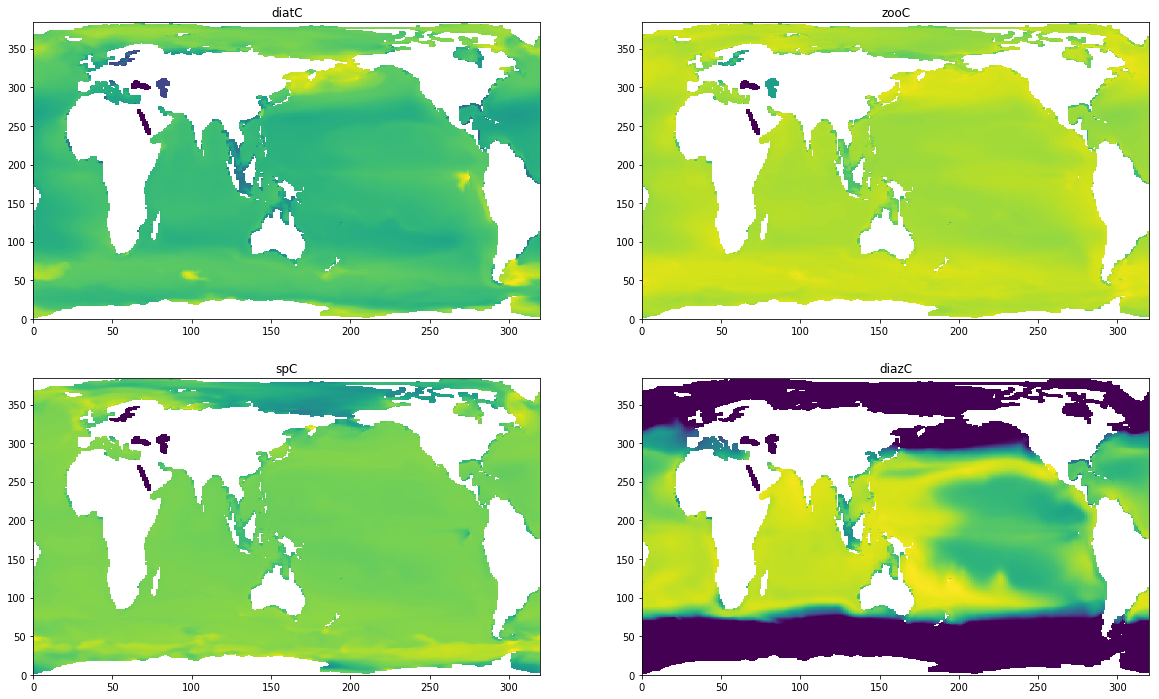

In [208]:
c_vars = ["diatC", "zooC", "spC", "diazC"]
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axef = axes.ravel()
for v, var in enumerate(c_vars):
    axef[v].pcolormesh(np.ma.array(data[var][0], mask=data[var][0] > 1e30), 
                  norm=colors.LogNorm(vmin=0.1, vmax=max_var_vals[var]))
    axef[v].set_title(var)

In [ ]:
plt.hist2d(data[])

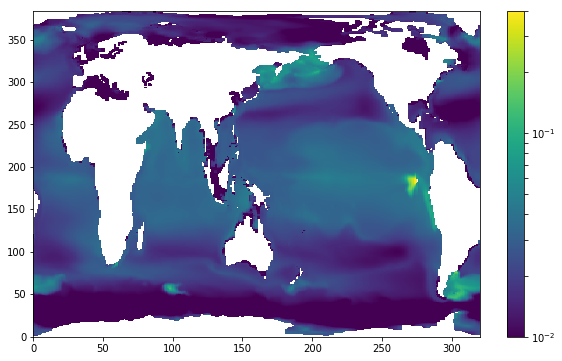

In [182]:
plt.figure(figsize=(10, 6))
plt.pcolormesh(np.ma.array(data["diat_loss_poc"][0], mask=data["diat_loss_poc"][0] > 1e30), norm=colors.LogNorm(vmin=0.01, vmax=0.4))
plt.colorbar()

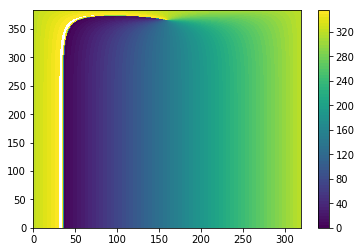

In [8]:
plt.contourf(data["TLONG"], np.arange(0, 360, 5))
plt.colorbar()

/Users/dgagne/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


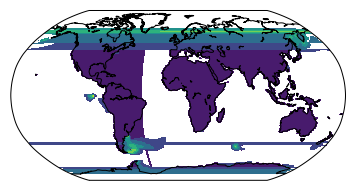

In [36]:
m = Basemap(projection='robin', lon_0=0)
x, y = m(data["TLONG"].values[:-50], data["TLAT"].values[:-50])
m.drawcoastlines()
plt.contourf(x,y, np.ma.array(data["diatC"][0], mask=data["diatC"][0] > 1e30)[:-50])

diatC 3.05416e-13 490.593
zooC 4.03028e-12 156.424
spC 1.60229e-14 276.97
diazC -0.002354 13.4897


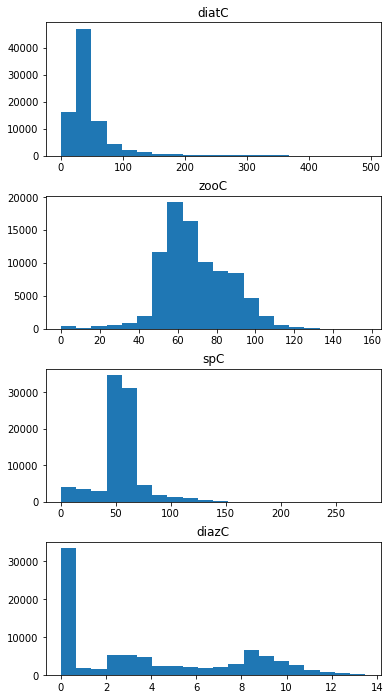

In [210]:
plankton_vars = ["diatC", "zooC", "spC", "diazC"]
plankton_data = {}
fig, axes = plt.subplots(len(plankton_vars), 1, figsize=(6, 12))
axes_flat = axes.ravel()
plt.subplots_adjust(hspace=0.3)

for v, var in enumerate(plankton_vars):
    plankton_data[var] = data[var][0].values
    plankton_data[var][plankton_data[var] > 1e30] = np.nan
    print(var, plankton_data[var][~np.isnan(plankton_data[var])].min(), plankton_data[var][~np.isnan(plankton_data[var])].max())
    axes_flat[v].hist(plankton_data[var][~np.isnan(plankton_data[var])], 20)
    axes_flat[v].set_title(var)

sp_agg 0.0 16.1637
diat_agg 0.0 39.0613
diat_loss_poc 0.0 0.464442
graze_diat_poc 0.0 19.4574
graze_sp_poc 0.0 8.07995
sp_loss_poc 0.0 1.07477
zoo_loss_poc 0.0 4.19881


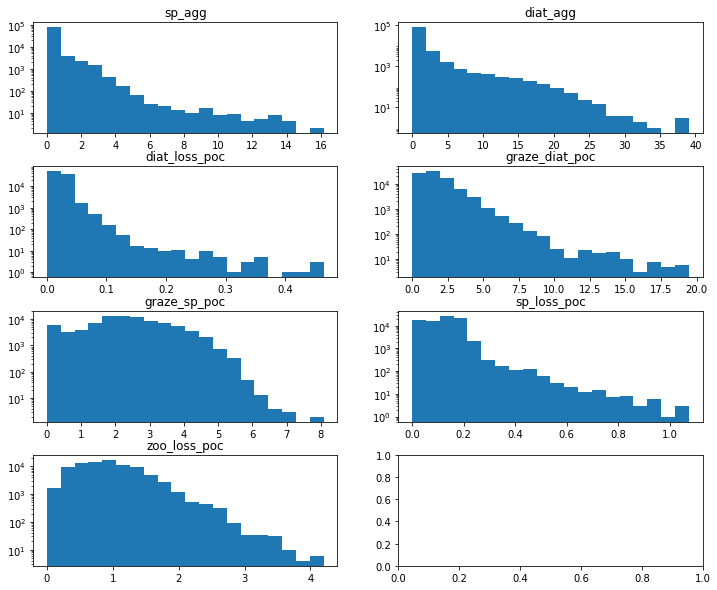

In [4]:
budget_vars = ["sp_agg", "diat_agg", "diat_loss_poc", "graze_diat_poc", "graze_sp_poc", "sp_loss_poc", "zoo_loss_poc"]
budget_data = {}
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.3)
axes_flat = axes.ravel()
for v, var in enumerate(budget_vars):
    budget_data[var] = data[var][0].values
    budget_data[var][budget_data[var] > 1e30] = np.nan
    print(var, budget_data[var][~np.isnan(budget_data[var])].min(), budget_data[var][~np.isnan(budget_data[var])].max())
    axes_flat[v].hist(budget_data[var][~np.isnan(budget_data[var])], 20)
    axes_flat[v].set_title(var)
    axes_flat[v].set_yscale("log")

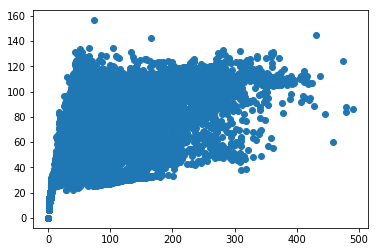

In [87]:
plt.scatter(plankton_data["diatC"][~np.isnan(plankton_data["diatC"])],
          plankton_data["zooC"][~np.isnan(plankton_data["spC"])])

In [216]:
plankton_flat_data = {}
for k,v in plankton_data.items():
    plankton_flat_data[k] = v.ravel()
plankton_frame = pd.DataFrame(plankton_flat_data)
plankton_frame_valid = plankton_frame.dropna()

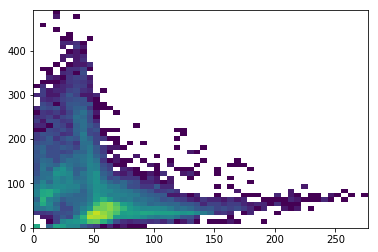

In [226]:
out = plt.hist2d(plankton_frame_valid["spC"], plankton_frame_valid["diatC"], bins=50,
                 norm=colors.LogNorm(vmin=1, vmax=20000))

In [10]:
budget_flat_data = {}
for k,v in budget_data.items():
    budget_flat_data[k] = v.ravel()
budget_frame = pd.DataFrame(budget_flat_data)
budget_frame_valid = budget_frame.dropna()

In [83]:
mms = MinMaxScaler()
scaled_plankton_frame = mms.fit_transform(plankton_frame.dropna())
dbs = DBSCAN(eps=0.5)
dbs.fit(scaled_plankton_frame)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [85]:
dbs.components_

(86212, 4)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129acf0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12422cd30>]], dtype=object)

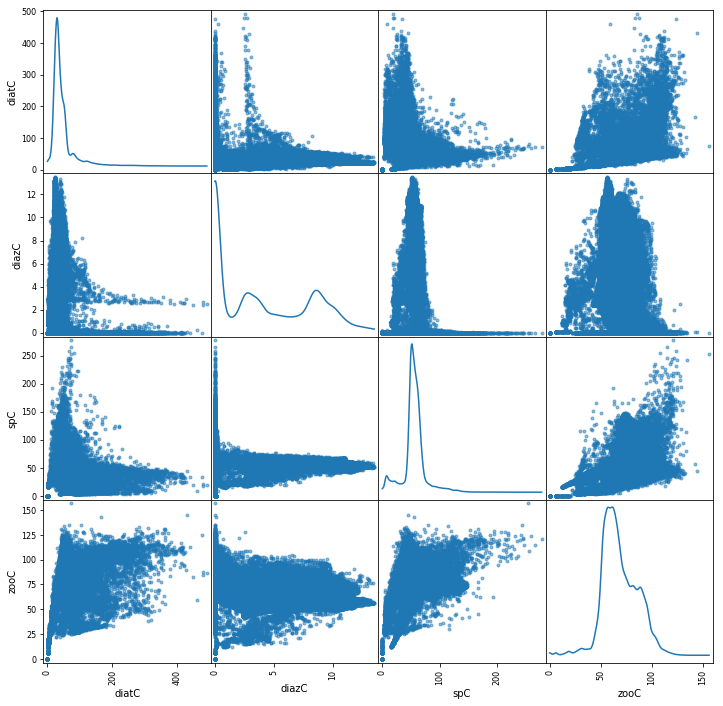

In [90]:
scatter_matrix(plankton_frame, figsize=(12, 12), diagonal="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c0b7d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x13d5d3780>]], dtype=object)

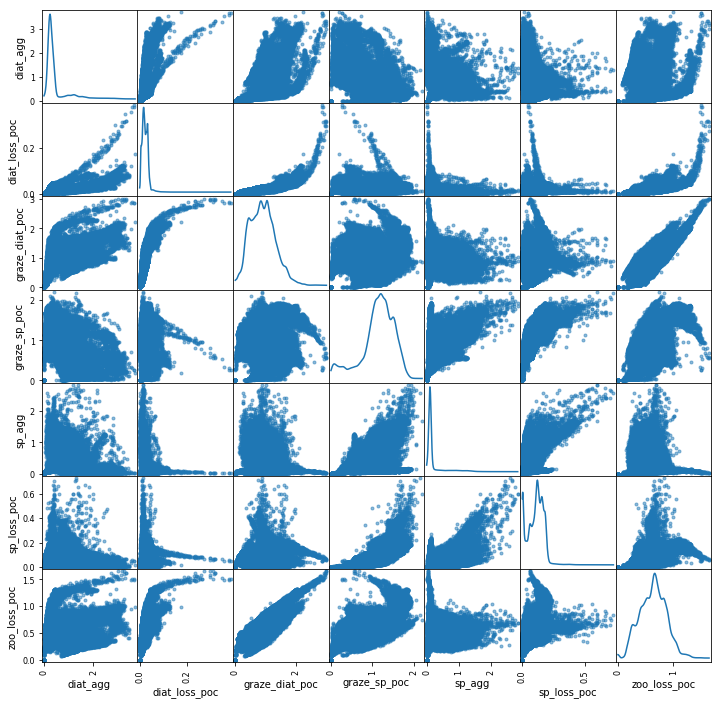

In [96]:
scatter_matrix((budget_frame.dropna() + 1).apply(np.log), figsize=(12, 12), diagonal="kde")

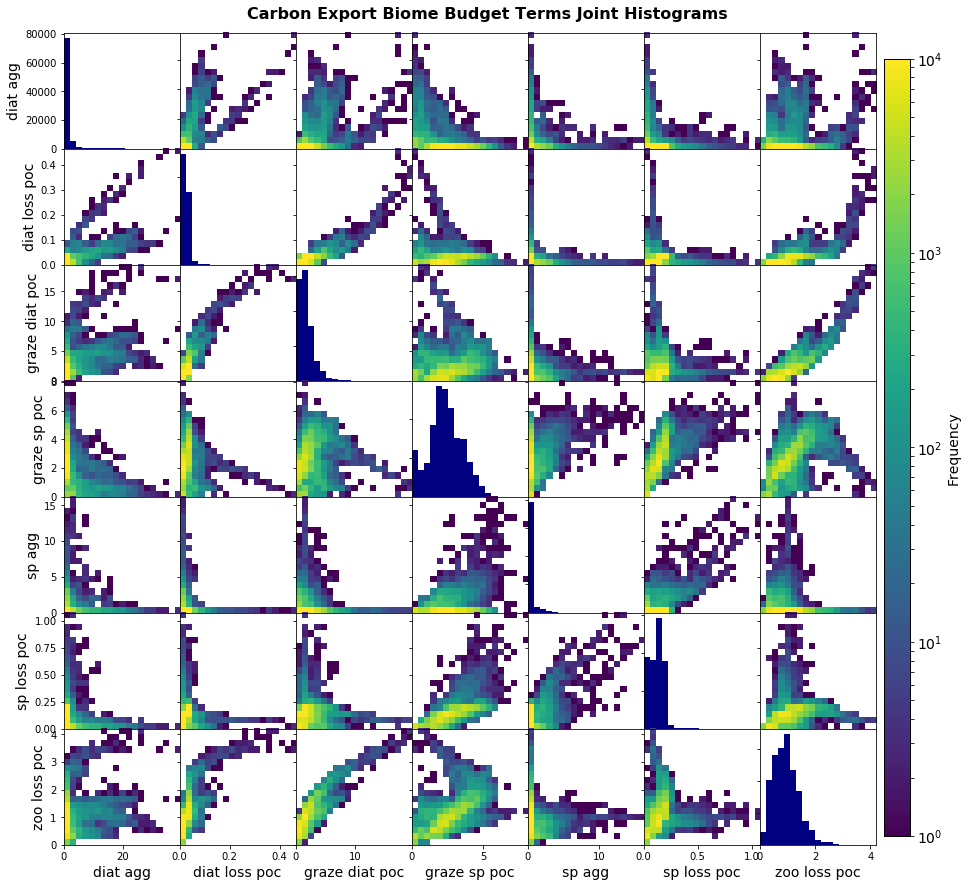

In [66]:
num_cols = budget_frame_valid.shape[1]
fig, axes = plt.subplots(num_cols, num_cols, figsize=(12, 12))
plt.subplots_adjust(0.01, 0.01, 0.95, 0.95, hspace=0, wspace=0)
cax = fig.add_axes([0.96, 0.02, 0.03, 0.9])
for r, r_col in enumerate(budget_frame_valid.columns):
    axes[r, 0].set_ylabel(r_col.replace("_", " "), fontsize=14)
    r_min = budget_frame_valid[r_col].min()
    r_max = budget_frame_valid[r_col].max()
    r_bins = np.linspace(r_min, r_max, 20)
    for c, c_col in enumerate(budget_frame_valid.columns):
        if r < num_cols - 1:
            plt.setp(axes[r, c].get_xticklabels(), visible=False)
        c_min = budget_frame_valid[c_col].min()
        c_max = budget_frame_valid[c_col].max()
        c_bins = np.linspace(c_min, c_max, 20)
        if r == c:
            axes[r, c].hist(budget_frame_valid[r_col], r_bins, color="navy")
            axes[r, c].set_xlim(r_min, r_max)
        else:
            H, xedges, yedges, img = axes[r, c].hist2d(budget_frame_valid[c_col], 
                              budget_frame_valid[r_col], (c_bins, r_bins), cmin=1, 
                              norm=colors.LogNorm(vmin=1, vmax=10000))
            axes[r, c].set_xlim(c_min, c_max)
            axes[r, c].set_ylim(r_min, r_max)
        if c > 0:
            plt.setp(axes[r, c].get_yticklabels(), visible=False)

        if r == num_cols - 1:
            axes[r, c].set_xlabel(c_col.replace("_", " "), fontsize=14)
    cbar = fig.colorbar(img, cax=cax)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Frequency", fontsize=14)
fig.suptitle("Carbon Export Biome Budget Terms Joint Histograms", fontsize=16, fontweight="bold")
plt.savefig("ceb_budget_joint_hist.png", dpi=300, bbox_inches="tight")

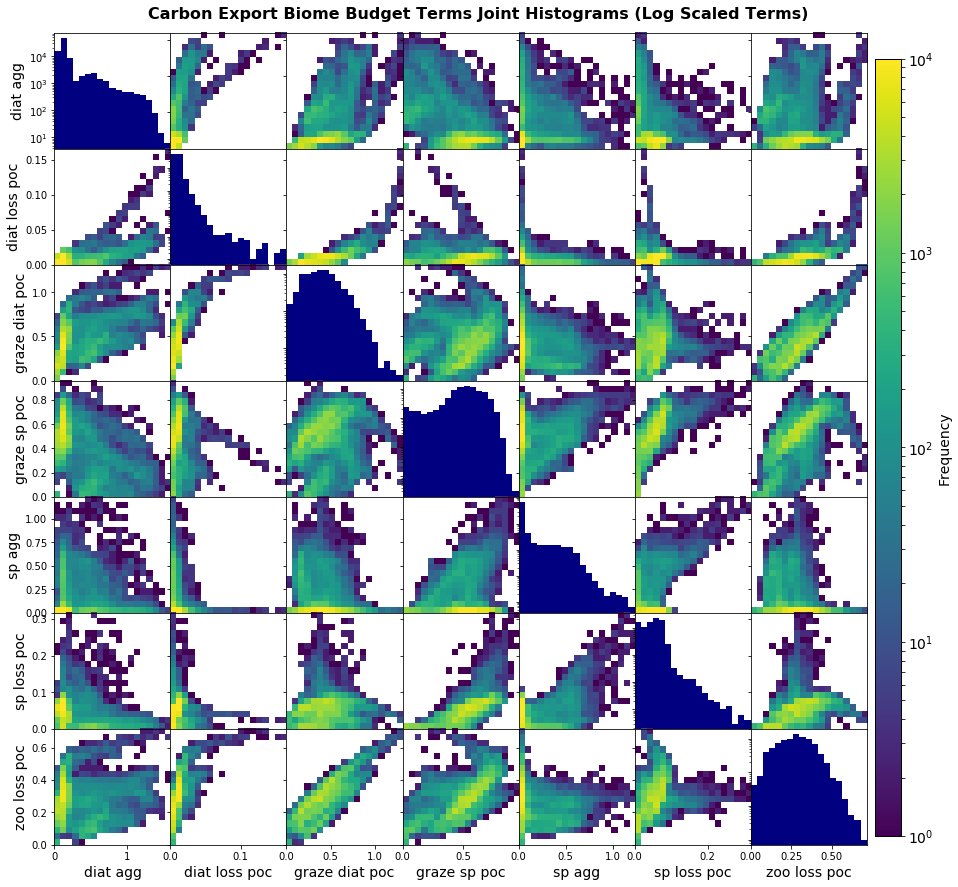

In [127]:
log_frame = np.log10(budget_frame_valid + 1)
num_cols = log_frame.shape[1]
fig, axes = plt.subplots(num_cols, num_cols, figsize=(12, 12))
plt.subplots_adjust(0.01, 0.01, 0.95, 0.95, hspace=0, wspace=0)
cax = fig.add_axes([0.96, 0.02, 0.03, 0.9])
for r, r_col in enumerate(log_frame.columns):
    axes[r, 0].set_ylabel(r_col.replace("_", " "), fontsize=14)
    r_min = log_frame[r_col].min()
    r_max = log_frame[r_col].max()
    r_bins = np.linspace(r_min, r_max, 20)
    for c, c_col in enumerate(log_frame.columns):
        if r < num_cols - 1:
            plt.setp(axes[r, c].get_xticklabels(), visible=False)
        c_min = log_frame[c_col].min()
        c_max = log_frame[c_col].max()
        c_bins = np.linspace(c_min, c_max, 20)
        if r == c:
            axes[r, c].hist(log_frame[r_col], r_bins, color="navy")
            axes[r, c].set_xlim(r_min, r_max)
            axes[r, c].set_yscale("log")
        else:
            H, xedges, yedges, img = axes[r, c].hist2d(log_frame[c_col], 
                              log_frame[r_col], (c_bins, r_bins), cmin=1, 
                              norm=colors.LogNorm(vmin=1, vmax=10000))
            axes[r, c].set_xlim(c_min, c_max)
            axes[r, c].set_ylim(r_min, r_max)
        if c > 0:
            plt.setp(axes[r, c].get_yticklabels(), visible=False)

        if r == num_cols - 1:
            axes[r, c].set_xlabel(c_col.replace("_", " "), fontsize=14)
    cbar = fig.colorbar(img, cax=cax)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Frequency", fontsize=14)
fig.suptitle("Carbon Export Biome Budget Terms Joint Histograms (Log Scaled Terms)", fontsize=16, fontweight="bold")
plt.savefig("ceb_budget_joint_hist_log.png", dpi=300, bbox_inches="tight")

In [49]:
dir(axes[1,1])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',


In [57]:
axes[1, 1].draw_artist

<bound method _AxesBase.draw_artist of <matplotlib.axes._subplots.AxesSubplot object at 0x126b147f0>>

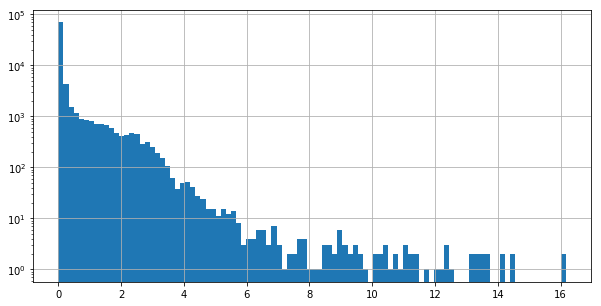

In [76]:
fig, ax = plt.subplots(figsize=(10, 5))
budget_frame_valid["sp_agg"].hist(bins=100)
ax.set_yscale("log")

In [137]:
km_norm = KMeans(n_clusters=5)
cluster_ids_norm = km_norm.fit_predict((log_frame - log_frame.mean(axis=0)) / log_frame.std())

In [138]:
km = KMeans(n_clusters=5)
cluster_ids = km.fit_predict(log_frame)

In [139]:
def regrid_clusters(cluster_id_values, grid_shape, valid_indices):
    cluster_flat_grid = np.ones(np.prod(grid_shape), dtype="int32") * np.nan
    cluster_flat_grid[valid_indices] = cluster_id_values
    return cluster_flat_grid.reshape(grid_shape)

cluster_grid = regrid_clusters(cluster_ids, (384, 320), log_frame.index.values)
cluster_grid_norm = regrid_clusters(cluster_ids_norm, (384, 320), log_frame.index.values)

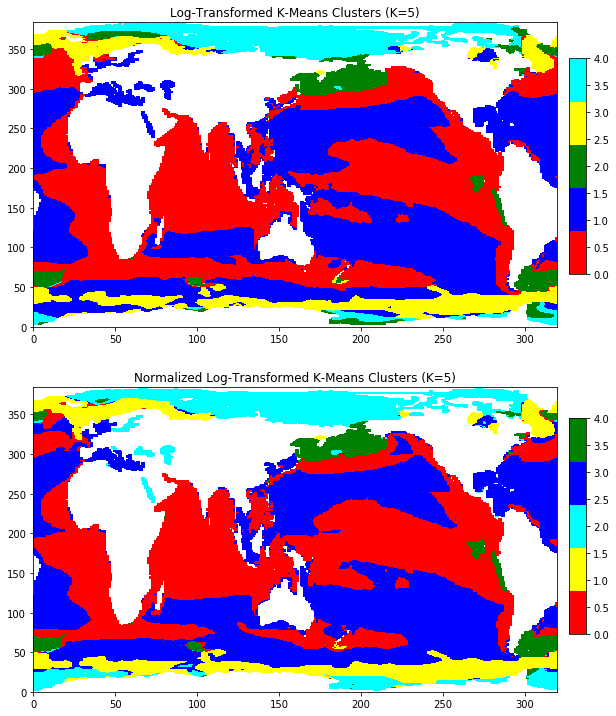

In [155]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))
plt.subplots_adjust(0.02, 0.02, 0.93, 0.95)
log_colors = axes[0].pcolormesh(np.ma.array(cluster_grid, mask=np.isnan(cluster_grid)), vmin=0, vmax=4, 
               cmap=colors.ListedColormap(["red", "blue", "green", "yellow", "cyan"]))
axes[0].set_title("Log-Transformed K-Means Clusters (K=5)")
log_norm_colors = axes[1].pcolormesh(np.ma.array(cluster_grid_norm, mask=np.isnan(cluster_grid)), vmin=0, vmax=4, 
               cmap=colors.ListedColormap(["red", "yellow", "cyan", "blue", "green"]))
axes[1].set_title("Normalized Log-Transformed K-Means Clusters (K=5)")
cbar_ax_0 = fig.add_axes([0.95, 0.6, 0.03, 0.3])
cbar_ax_1 = fig.add_axes([0.95, 0.1, 0.03, 0.3])
fig.colorbar(log_colors, cax=cbar_ax_0)
fig.colorbar(log_norm_colors, cax=cbar_ax_1)
plt.savefig("log_cluster_maps.png", dpi=300, bbox_inches="tight")

In [120]:
km.cluster_centers_.shape

(5, 7)

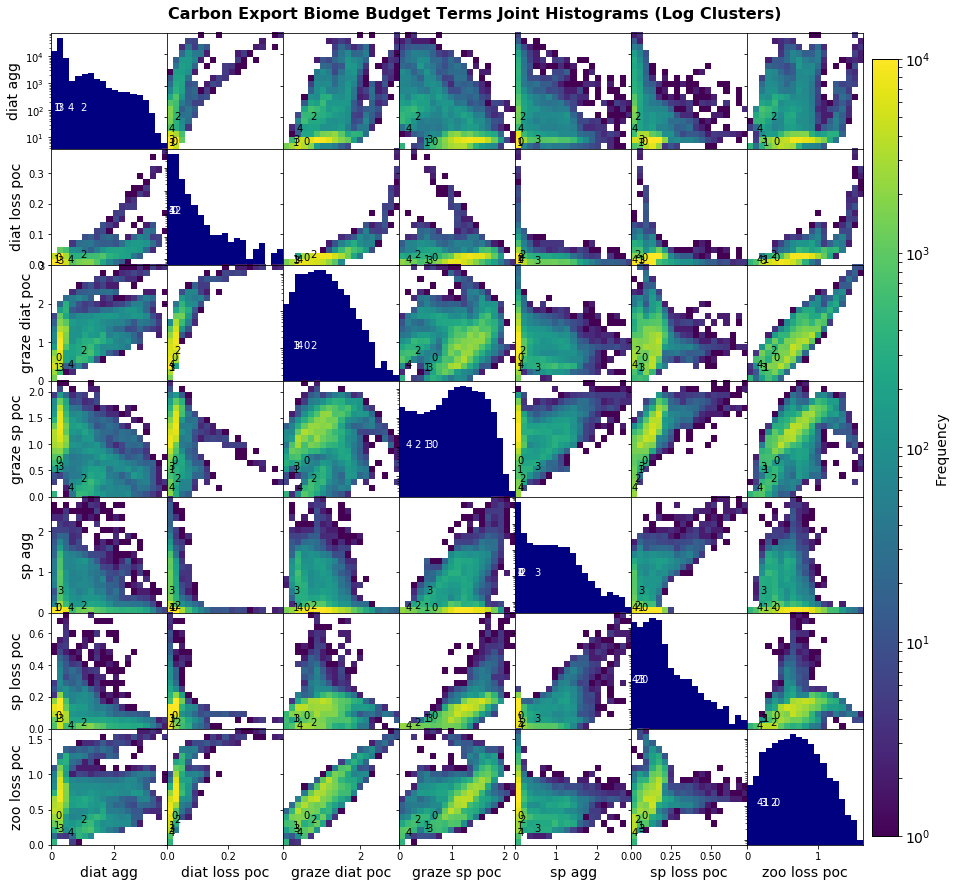

In [165]:
log_frame = np.log(budget_frame_valid + 1)
num_cols = log_frame.shape[1]
fig, axes = plt.subplots(num_cols, num_cols, figsize=(12, 12))
plt.subplots_adjust(0.01, 0.01, 0.95, 0.95, hspace=0, wspace=0)
cax = fig.add_axes([0.96, 0.02, 0.03, 0.9])
for r, r_col in enumerate(log_frame.columns):
    axes[r, 0].set_ylabel(r_col.replace("_", " "), fontsize=14)
    r_min = log_frame[r_col].min()
    r_max = log_frame[r_col].max()
    r_bins = np.linspace(r_min, r_max, 20)
    for c, c_col in enumerate(log_frame.columns):
        if r < num_cols - 1:
            plt.setp(axes[r, c].get_xticklabels(), visible=False)
        c_min = log_frame[c_col].min()
        c_max = log_frame[c_col].max()
        c_bins = np.linspace(c_min, c_max, 20)
        if r == c:
            axes[r, c].hist(log_frame[r_col], r_bins, color="navy")
            axes[r, c].set_xlim(r_min, r_max)
            axes[r, c].set_yscale("log")
            for cluster in range(km.cluster_centers_.shape[0]):
                axes[r, c].text(km.cluster_centers_[cluster, c], 100, cluster, color="white")
        else:
            H, xedges, yedges, img = axes[r, c].hist2d(log_frame[c_col], 
                              log_frame[r_col], (c_bins, r_bins), cmin=1, 
                              norm=colors.LogNorm(vmin=1, vmax=10000))
            axes[r, c].set_xlim(c_min, c_max)
            axes[r, c].set_ylim(r_min, r_max)
            for cluster in range(km.cluster_centers_.shape[0]):
                axes[r, c].text(km.cluster_centers_[cluster, c], km.cluster_centers_[cluster, r], cluster)
        if c > 0:
            plt.setp(axes[r, c].get_yticklabels(), visible=False)

        if r == num_cols - 1:
            axes[r, c].set_xlabel(c_col.replace("_", " "), fontsize=14)
    cbar = fig.colorbar(img, cax=cax)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Frequency", fontsize=14)
fig.suptitle("Carbon Export Biome Budget Terms Joint Histograms (Log Clusters)", fontsize=16, fontweight="bold")
plt.savefig("ceb_budget_joint_hist_log_clusters.png", dpi=300, bbox_inches="tight")

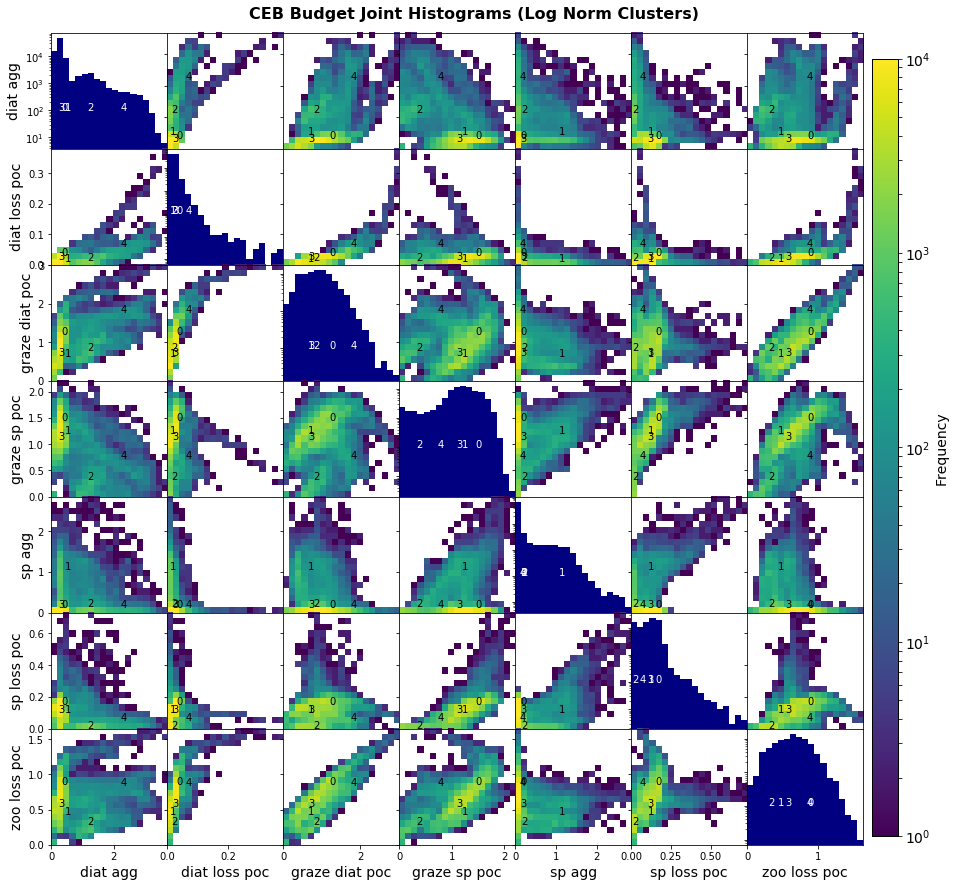

In [166]:
log_frame = np.log(budget_frame_valid + 1)
num_cols = log_frame.shape[1]
fig, axes = plt.subplots(num_cols, num_cols, figsize=(12, 12))
plt.subplots_adjust(0.01, 0.01, 0.95, 0.95, hspace=0, wspace=0)
cax = fig.add_axes([0.96, 0.02, 0.03, 0.9])
scaled_centers = km_norm.cluster_centers_ * log_frame.std(axis=0).values + log_frame.mean(axis=0).values
for r, r_col in enumerate(log_frame.columns):
    axes[r, 0].set_ylabel(r_col.replace("_", " "), fontsize=14)
    r_min = log_frame[r_col].min()
    r_max = log_frame[r_col].max()
    r_bins = np.linspace(r_min, r_max, 20)
    for c, c_col in enumerate(log_frame.columns):
        if r < num_cols - 1:
            plt.setp(axes[r, c].get_xticklabels(), visible=False)
        c_min = log_frame[c_col].min()
        c_max = log_frame[c_col].max()
        c_bins = np.linspace(c_min, c_max, 20)
        if r == c:
            axes[r, c].hist(log_frame[r_col], r_bins, color="navy")
            axes[r, c].set_xlim(r_min, r_max)
            axes[r, c].set_yscale("log")
            for cluster in range(scaled_centers.shape[0]):
                axes[r, c].text(scaled_centers[cluster, c], 100, cluster, color="white")
        else:
            H, xedges, yedges, img = axes[r, c].hist2d(log_frame[c_col], 
                              log_frame[r_col], (c_bins, r_bins), cmin=1, 
                              norm=colors.LogNorm(vmin=1, vmax=10000))
            axes[r, c].set_xlim(c_min, c_max)
            axes[r, c].set_ylim(r_min, r_max)
            for cluster in range(scaled_centers.shape[0]):
                axes[r, c].text(scaled_centers[cluster, c], scaled_centers[cluster, r], cluster)
        if c > 0:
            plt.setp(axes[r, c].get_yticklabels(), visible=False)

        if r == num_cols - 1:
            axes[r, c].set_xlabel(c_col.replace("_", " "), fontsize=14)
    cbar = fig.colorbar(img, cax=cax)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_ylabel("Frequency", fontsize=14)
fig.suptitle("CEB Budget Joint Histograms (Log Norm Clusters)", fontsize=16, fontweight="bold")
plt.savefig("ceb_budget_joint_hist_log_norm_clusters.png", dpi=300, bbox_inches="tight")

array([[ 0.32272025,  0.03060848,  1.20641749,  1.45409779,  0.11877081,
         0.15025765,  0.85727161],
       [ 0.44813036,  0.00931569,  0.63880876,  1.19262422,  1.06326123,
         0.10212791,  0.43627161],
       [ 1.15006172,  0.01395358,  0.77588306,  0.32054016,  0.15521513,
         0.00377089,  0.29245582],
       [ 0.23930229,  0.01718447,  0.6471379 ,  1.09588108,  0.11919119,
         0.10267428,  0.54492331],
       [ 2.19831525,  0.06058158,  1.76462734,  0.72338387,  0.11791769,
         0.0497173 ,  0.84086086]])

In [161]:
km_norm.cluster_centers_.shape

(5, 7)